##  Compte rendu TP1  
## Présenté par : Elagas Amel 2DNI G1

## Introduction :

Soient a et b deux r´eels tels que a < b. Etant donn´ee une fonction f : [a,b] → R continue. On va approximer (s’ils existent) des z´eros (ou des racines) de f, c’est  à dire, les solutions de l’´equation f(x) = 0
f(α)=0, α est un zéro de f
Le calcul de telle α n'est pas facile en générale analytiqument.C'est pourquoiqs, on a recours à des méthodes iteratives Pour approcher telle α.
Notons qu’il est diﬃcile dans beaucoup de cas de donner la valuer exacte de telle racine α. C’est pourquoi on a besoin de m´ethodes itératives pour donner une valeur approch´ee (ou approximative) de α. L’id´ee g´en´erale est de contruire une suite (xn) qui converge vers 

## Question : Comment construire la suite (xn)? 
## Idée : On se dispose de 3 m´ethodes pour contruire telle (xn), qui sont comme suit : 
* (i) la méthode de la dichotomie (ou bissection); 
* (ii) la méthode de point ﬁxe; 
* (iii) la méthode de Newton.

La méthode de Newton est basée sur la construction d’une suite (xn) qui converge vers un zéro α d’une fonction continue 
f :[a,b]→R.

## Exercice 1:<h2>
>On considère le polynôme $p(x) = (x - 1)^6$. 
>
>En développant on
>peut écrire ce même polynôme sous la forme
>$f(x) = x^6 - 6x^5 + 15x^4 - 20x^3 + 15x^2 - 6x + 1.$
>
>1) Avec Matlab évaluer $p(x)$ et $f(x)$ pour $x$ allant de $.998$ à
>$1.002$ en choisissant des pas de $.0001$.
>
>2) Faire un graphique de $f(x)$ et $p(x)$. Commenter.

In [2]:
import matplotlib.pyplot as plt
from numpy import linspace

In [4]:

def ploting(x=False):
    T=linspace(-2,2,41)
    plt.title("solution dans [-2:2] ");
    plt.xlabel("x")
    plt.ylabel ("f(x)")
    plt.grid(True)
    plt.plot(T,f(T))
    if x:
        plt.scatter(x,f(x),color='r')
    plt.show()


In [5]:
def f(x):
    y=x**3+x**2-3*x-3
    
    return y

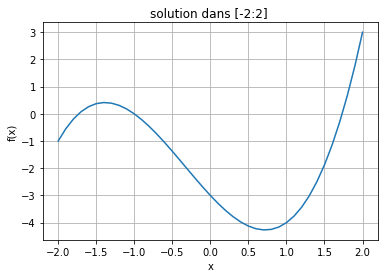

In [6]:
ploting()

## Methode de dichotomie 

In [7]:
def dicho(f,a,b,tol):
    if (abs(a-b)<=tol) or f((a+b)/2)==0:
        m=(a+b)/2
    elif ((f((a+b)/2))*f(a))<0:
        m=dicho(f,a,(a+b)/2,tol)
    else:
        m=dicho(f,(a+b)/2,b,tol)
    return m

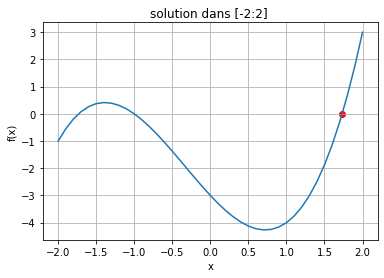

1.7320518493652344


In [8]:
point=dicho(f,-2,2,0.00001)
ploting(point)
print(point)

In [9]:
def dichow(f,a,b,tol,count=0):
    if (abs(a-b)<=tol) or f((a+b)/2)==0:
        m=(a+b)/2
    elif ((f((a+b)/2))*f(a))<0:
        count+=1
        m,count=dichow(f,a,(a+b)/2,tol,count)
        
    else:
        count+=1
        m,count=dichow(f,(a+b)/2,b,tol,count)
    return (m,count)

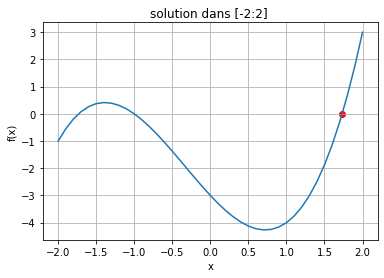

la solution est  1.732025146484375, Nombre des itérations 15 


In [11]:
(point,count)=dichow(f,0,2,0.0001)
ploting(point)

print('la solution est  {}, Nombre des itérations {} '.format(point,count))

## Expliquer ces sources d'erreurs !!!!

### Résultat ( MATLAB/OCTAVE)
<img src="sol12.png">

In [3]:
######










# EXERCICE 2:

>On considère l'équation : $$ f(x)=x^3+x^2-3x-3=0$$
>1) Dessiner la courbe de $f$ dans l'intervalle $[-2;2]$, puis trouver des intervalles convenables pour appliquer la méthode de >bisection.
>
>2) Utiliser un programme `dicho.m` qui permettra de trouver les solutions de l'équation $f(x)=0$ avec $eps=0.001$.
>
>3) Modifier le programme `dicho.m` pour qu'il donne le nombre d'itération nécessaire pour avoir la solution à $eps$ près.

## Version Python

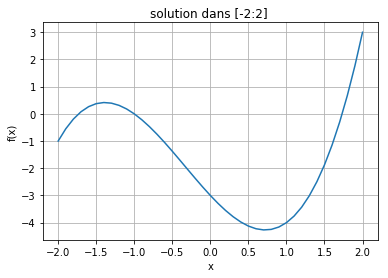

In [2]:
import matplotlib.pyplot as plt
from numpy import linspace
f=lambda x: x**3+x**2-3*x-3
T=linspace(-2,2,41)
plt.title("solution dans [-2:2] ");
plt.xlabel("x")
plt.ylabel ("f(x)")
plt.grid(True)
plt.plot(T,f(T))


# Daprés le graph de $f$ il existe 3 solutions :
- $\alpha_1 \in ]-2;-1.5[$ 
- $\alpha_2 \in ]-1.5;-0.5[$ 
- $\alpha_3 \in ]1.5;2[$ 

# 2.2 
<p> La méthode de la dichotomie (ou bissection) est une méthode pour trouver une solution approchée à une équation f(x)=0. <br/>
Précisément, supposons que la fonction f est continue sur l'intervalle I=[a,b] et il exite $\alpha_ \in I tq $f($\alpha_ )=0$ <br/>
La méthode consiste à diviser l'intervalle en deux en calculant m=(a+b)/2. <br/>
Ilya deux possiblites: f(a)*f(m) sont de signes contraires ou bien f(b)*f(m).<br/>
=> L'algorithme s'applique au sous-intervalle dans lequel le changement de signe se produit.<br/>
=> L'algorithme est recursif.(Le processus se repete ) </p>
Le programme `dicho.m` permette de trouver les solutions de l'équation $f(x)=0$ avec $eps=0.001$.

In [15]:
def dicho(a,b,f,e):
    m=(a+b)/2
    ecart = abs(b-a)
    while ecart>e:
        if f(a)*f(m)<0:
             b=m
        else:
            a=m
        m=(a+b)/2
        ecart = b-a
    return m
print(dicho(-2,-1.5,f,0.001))

-1.73193359375


In [16]:
print(dicho(-1.5,-0.9,f,0.001))

-0.9999023437500002


In [17]:
print(dicho(1.5,2,f,0.001))

1.73193359375


## Transformer le code précédent pour trouver desvaleurs approchées des solutions $\alpha_1$, $\alpha_2$ et $\alpha_3$ de l'equation (E)

Le nombre d'itération N nécéssaire à la méthode de la dichotomie pour trouver $\alpha$ à $10^{-p}$ prés 

$$N \geq E\left(\dfrac{\ln(b-a)+p\ln(10)}{\ln(2)}\right)+1$$

Pour afficher le nombre d’itérations effectuées, on utilise un compteur, incrémenté à chaque passage dans la boucle :


In [18]:
def dichow(a,b,f,eps):
    m=(a+b)/2
    ecart = abs(b-a)
    n=0
    while abs(b-a)>eps:
        n+=1
        if f(a)*f(m)<0:
             b=m
        else:
            a=m
        m=(a+b)/2
        
    print (" nombre d'itérations nécessaires :", n )
    return m

Le nombre d'itération N nécéssaire à la méthode de la dichotomie pour trouver $\alpha$ à $10^{-3}$ prés 

In [19]:
print(dichow(-2,-1.5,f,10**(-3)))
print(dichow(-1.5,-0.9,f,10**(-3)))
print(dichow(1.5,2,f,10**(-3)))

 nombre d'itérations nécessaires : 9
-1.73193359375
 nombre d'itérations nécessaires : 10
-0.9999023437500002
 nombre d'itérations nécessaires : 9
1.73193359375


Le nombre d'itération N nécéssaire à la méthode de la dichotomie pour trouver  𝛼  à  10−5  prés

In [20]:
interval=[[-2,-1.5],[-1.51,-0.5],[1.5,2]]
for u in interval:
    print(dichow(u[0],u[1],f,10**(-5)))

 nombre d'itérations nécessaires : 16
-1.7320518493652344
 nombre d'itérations nécessaires : 17
-1.0000028610229492
 nombre d'itérations nécessaires : 16
1.7320518493652344


## Méthode graphique pour la recherche de la solution

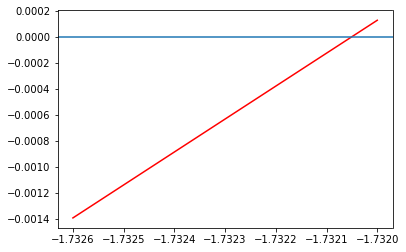

In [21]:
#alpha 1
x = linspace ( -1.7326,-1.732)
y = f ( x )
plt.plot (x , y,'r' )
plt.axhline ()
plt.show ()

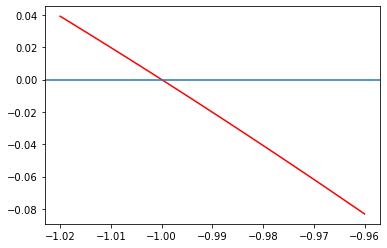

In [22]:
#alpha 2
x = linspace (-1.02,-0.96)
y = f ( x )
plt.plot (x , y,'r' )
plt.axhline ()
plt.show ()

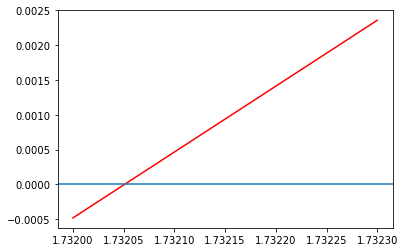

In [23]:
#alpha 3
x = linspace ( 1.732,1.7323)
y = f ( x )
plt.plot (x , y,'r' )
plt.axhline ()
plt.show ()

# EXERCICE 3:
>On considère l'équation : $$ f(x)=x^3+4x^2-10=0$$
>1) Dessiner la courbe de $f$ dans l'intervalle $[1;2]$, puis trouver une valeur approché de la solution à 0.001 près (En >utilisant la fonction zoom du graphique).
>
>2) Vérifier que cette équation est équivalente aux 3 schéma du point fixe suivant:
>
>a) $g_1(x)=\frac{1}{2}\sqrt{10-x^3}=x$.
>
>b) $g_2(x)=\sqrt{\displaystyle\frac{10}{4+x}}=x$.
>
>c) $g_3(x)=x-x^3-4x^2+10=x$.
>
>3) Ecrire puis appliquer  une fonction Matlab que l'on appellera  `pointfixe.m` aux trois schémas précédents en prenant >`x0=1.5;eps=0.001`.
>
>4) Quelle est la fonction (parmi $g_1, g_2$ et $g_3$) qui donne la convergence la plus rapide?
>

### Correction <h3>

#### 1)<h4>

#### 2) Justification théorique pour la fonction g1

On considère l'équation : $$ f(x)=x^3+4x^2-10=0$$

a) $g(x)=\frac{1}{2}\sqrt{10-x^3}=x$.

 $$x^3+4x^2-10=0$$ 
    
 $$4x^2=10-x^3$$
 
 $$2x=\sqrt{10-x^3}$$
 
 $$x=\frac{1}{2}\sqrt{10-x^3}$$
 
Donc $ f(x)=g(x)$

## Calcul symbolique de la dérivée

In [63]:
from sympy import *
import numpy as np
x, y, z = symbols('x y z')
init_printing(use_unicode=True)
g1=lambda x: 1/2*sqrt(10-x**3)


In [76]:
dg1=lambdify(x,diff(g1(x),x,1))
dg1(1.365)

### Que pouvez vous conclure à propos des convergences de g1

 ## La valeur absolu de la derivée egale à 0.5117446282927461 avec 1>0.5117446282927461 donc g1 converge localement 

## Justification théoriques pour g2 et g3

On considère l'équation : $$ f(x)=x^3+4x^2-10=0$$

b) $g(x)=\sqrt{\displaystyle\frac{10}{4+x}}=x$.

$$x^3+4x^2-10=0$$
$$x^3+4x^2=10$$
$$x^2(x+4)=10$$
$$x^2=\frac{10}{x+4}$$
$$x=\sqrt{\displaystyle\frac{10}{4+x}}$$
Donc $ f(x)=g(x)$

On considère l'équation : $$ f(x)=x^3+4x^2-10=0$$
c) $g(x)=x-x^3-4x^2+10=x$.

$$x^3+4x^2-10=0$$
$$x^3+4x^2-10+x-x=0$$
$$x^3-4x^2+x-x=10$$
$$x^3-4x^2+x=x+10$$
$$4x^2+x=x-x^3+10$$
$$x=x-x^3-4x^2+10$$
Donc $ f(x)=g(x)$

## Etudier théoriquement la convergences de g2 

####  <span style='color:blue '>  1)  Justification théorique pour la fonction g2  </span>

On considère l'équation : $$ f(x)=x^3+4x^2-10=0$$

a) $g_2(x)=\sqrt{\displaystyle\frac{10}{4+x}}=x$.

$$x^3+4x^2-10=0$$ 
    
 $$4x^2=10-x^3$$
 
 $$2x=\sqrt{10-x^3}$$
 
 $$x=\frac{1}{2}\sqrt{10-x^3}$$
 
Donc $ f(x)=g(x)$




####  <span style='color:blue '>  2)  Calcul symbolique de la dérivée  </span>

In [1]:
from sympy import *
import numpy as np
x, y, z = symbols('x y z')
init_printing(use_unicode=True)
g2=lambda x: sqrt(10/(x+4))

In [2]:
dg1=lambdify(x,diff(g2(x),x,1))
dg1(1.365)

## La valeur absolu de la derivée egale à 0.12723758423338585  avec 1> 0.12723758423338585 donc g2 converge localement 

## Etudier théoriquement la convergences de g3 

#  <span style='color:blue '>  1)  Justification théorique pour la fonction g3  </span>

On considère l'équation : $$ f(x)=x^3+4x^2-10=0$$

a) $g_3(x)=x-x^3-4x^2+10=x$.


$$x^3+4x^2-10=0$$ 
    
 $$4x^2=10-x^3$$
 
 $$2x=\sqrt{10-x^3}$$
 
 $$x=\frac{1}{2}\sqrt{10-x^3}$$
 
Donc $ f(x)=g(x)$

####  <span style='color:blue '>  2)  Calcul symbolique de la dérivée  </span>

In [3]:
from sympy import *
import numpy as np
x, y, z = symbols('x y z')
init_printing(use_unicode=True)
g3=lambda x: x-x**3-4*x**2 + 10

In [4]:
dg1=lambdify(x,diff(g3(x),x,1))
dg1(1.365)

 ## La valeur absolu de la derivée egale à 15.509675000000001 avec 1<15.509675000000001  donc g3 diverge 

#### 4)<h4>

### Donner la solution avec un codepython 


In [94]:
f=lambda x:  x**3+4*x**2-10 # la fonction f
g1=lambda x: 1/2*sqrt(10-x**3)
g2=lambda x: sqrt(10/(x+4))
g3=lambda x: x-x**3-4*x**2 + 10


def ptfixe(g,x0,eps,nmax):
    pass





    print('pas de convergence avec le nombre d''iteration indique')



In [ ]:
ptfixe(g3,1.5,0.0001,30)

### quelle est la fonction qui donne la convergence la plus rapide ??

Donner le nombre d'itération pour chaque méthode convergent e
+ $g_2$ donne le resultat en ? itérations 
+ $g_1$ donne le resultat en ?
+ $g_3$ est - elle convergente?

# EXERCICE 4:
>1) On considère la fonction $f(x)=e^{-x}-x$. Ecrire puis appliquer  une fonction Matlab que l'on appellera `newton.m` à la >fonction $f$, en prenant $x0=0$, $eps=0.001$ .
>
>2) Montrer que l'équation $f(x)=0$ admet une solution unique que l'on peut obtenir en utilisant la méthode de Newton à partir >de $x0=1$.

### Solution Python

## Donner la solution entière avecun code python

## Conclusion <h2>

|Méthode de la dichotomie|Méthode de Point fixe|Méthode de Newton|
|:---:|:---:|:---:|
|* Elle est lente.|* Elle est rapide.|* Elle est rapide.| 
|*  est convergente.|* Soit convergence locale- Soit divergence.|*Convergence locale.| 
|* Ordre de convergence est égal à 1.|* Ordre de convergence dépend des dérivées successives en 0.|* Ordre de convergence est au moins 2.| 
